In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt
from scipy import stats

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, desc

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Display the row's columns and data in dictionary format
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fc660f36e50>,
 'tobs': 65.0,
 'station': 'USC00519397',
 'date': '2010-01-01',
 'prcp': 0.08,
 'id': 1}

In [11]:
# Display the row's columns and data in dictionary format
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fc660f58150>,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'elevation': 3.0,
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168,
 'id': 1}

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
#print(last_date)
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
year_ago

datetime.date(2016, 8, 23)

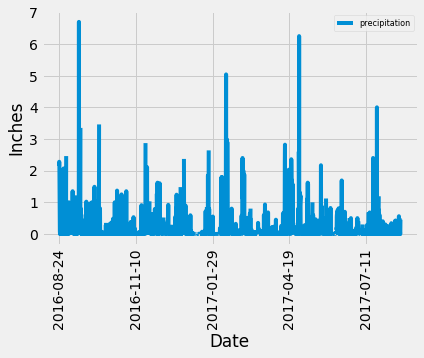

In [13]:
# Perform a query to retrieve the data and precipitation scores
last_twelve_months = session.query(Measurement.date, Measurement.prcp).\
                        filter(Measurement.date > year_ago).all() 
#print(last_twelve_months)
                                         
# Save the query results as a Pandas DataFrame and set the index to the date column
last_year_df=pd.DataFrame(last_twelve_months)
last_year_df=last_year_df.set_index("date")
last_year_df
# Sort the dataframe by date
last_year_df=last_year_df.sort_index()
last_year_df
# Use Pandas Plotting with Matplotlib to plot the data

last_year_df.plot()
plt.xlabel("Date")
plt.xticks(rotation='vertical')
plt.ylabel("Inches")
plt.legend(["precipitation"], loc=1, prop={'size': 8})
# plt.style
#plt.tight_layout()
plt.show()


In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
last_year_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [15]:
# Design a query to show how many stations are available in this dataset?
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
sel = [Measurement.station,
      func.count(Measurement.station).label("Count of Stations")]
most_active=session.query(*sel).\
    group_by(Measurement.station).\
    order_by(desc("Count of Stations")).all()
most_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [16]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
sel = [Measurement.station, 
       func.min(Measurement.tobs), 
       func.max(Measurement.tobs), 
       func.avg(Measurement.tobs)]
stationid_519281 = session.query(*sel).\
    filter(Measurement.station == 'USC00519281').all()
stationid_519281

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

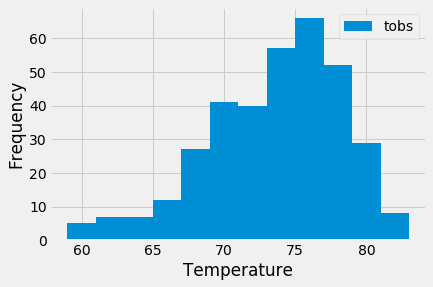

In [17]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# Perform a query to retrieve the date and precipitation scores
station_519281 = session.query(Measurement.tobs, Measurement.station).\
                        filter(Measurement.date > year_ago).\
                        filter(Measurement.station == 'USC00519281').all() 
#print(station_519281)
                                         
# Save the query results as a Pandas DataFrame 
station_df=pd.DataFrame(station_519281)
#station_df

# Use Pandas Plotting with Matplotlib to plot the data
plt.hist(station_df.tobs, bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend(['tobs'])
plt.show()


## Bonus Challenge Assignment

## Temperature Analysis I

In [18]:
#You may either use SQLAlchemy or pandas's read_csv() to perform this portion.
hawaii_temps = pd.read_csv("Resources/hawaii_measurements.csv")
hawaii_temps.head()

,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.08,65
1,USC00519397,2010-01-02,0.00,63
2,USC00519397,2010-01-03,0.00,74
3,USC00519397,2010-01-04,0.00,76
4,USC00519397,2010-01-06,NaN,73


In [19]:
#Identify the average temperature in June at all stations across all available years in the dataset. 
#Do the same for December temperature.
june_temps = hawaii_temps[pd.to_datetime(hawaii_temps['date']).dt.month == 6]
june_temps

,station,date,prcp,tobs
133,USC00519397,2010-06-01,0.00,78
134,USC00519397,2010-06-02,0.01,76
135,USC00519397,2010-06-03,0.00,78
136,USC00519397,2010-06-04,0.00,76
137,USC00519397,2010-06-05,0.00,77
...,...,...,...,...
19492,USC00516128,2017-06-26,0.02,79
19493,USC00516128,2017-06-27,0.10,74
19494,USC00516128,2017-06-28,0.02,74
19495,USC00516128,2017-06-29,0.04,76


In [20]:
avg_june_temps=june_temps['tobs'].mean()
avg_june_temps

74.94411764705882

In [21]:
dec_temps = hawaii_temps[pd.to_datetime(hawaii_temps['date']).dt.month == 12]
dec_temps

,station,date,prcp,tobs
305,USC00519397,2010-12-01,0.04,76
306,USC00519397,2010-12-03,0.00,74
307,USC00519397,2010-12-04,0.00,74
308,USC00519397,2010-12-06,0.00,64
309,USC00519397,2010-12-07,0.00,64
...,...,...,...,...
19323,USC00516128,2016-12-27,0.14,71
19324,USC00516128,2016-12-28,0.14,71
19325,USC00516128,2016-12-29,1.03,69
19326,USC00516128,2016-12-30,2.37,65


In [22]:
avg_dec_temps=dec_temps['tobs'].mean()
avg_dec_temps

71.04152933421226

In [23]:
#Use the t-test to determine whether the difference in the means, if any, is statistically significant. 
#Will you use a paired t-test, or an unpaired t-test? Why?
stats.ttest_ind(june_temps['tobs'], dec_temps['tobs'])

Ttest_indResult(statistic=31.60372399000329, pvalue=3.9025129038616655e-191)

An unpaired Ttest is most appropriate because the means being compared are from different groups (months in this instance). 

## Temperature Analysis II

In [24]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [25]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
vacation=calc_temps('2017-06-12', '2017-06-23')
print(vacation)

[(71.0, 76.8974358974359, 83.0)]


Text(0.5, 1, 'Trip Avg Temp')

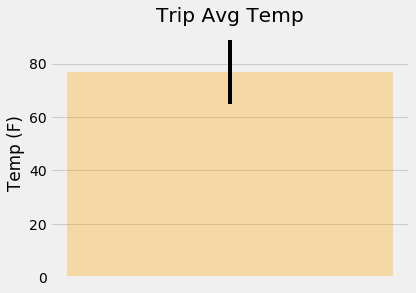

In [26]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
plt.bar(x=0, height=vacation[0][1], width=-0.4, yerr=vacation[0][2]-vacation[0][0], color='orange', tick_label=0, alpha=0.3)
plt.ylabel("Temp (F)")
plt.xticks([])
plt.tight_layout()
plt.title("Trip Avg Temp")

In [27]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
sel = [Measurement.station, 
       func.avg(Measurement.prcp)]
trip_rainfall = session.query(*sel).\
    filter(Measurement.date >= '2017-6-12').\
    filter(Measurement.date <= '2017-6-23').all()
trip_rainfall
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
# total_rainfall=session.query(Measurement.station, Station.name, Station.latitude, Station.longitude, Station.elevation, Measurement.prcp).order_by(Measurement.prcp.desc()).all()
# total_rainfall

[(None, None)]

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
